<a href="https://colab.research.google.com/github/graylan0/nfl-big-data-bowl-2024/blob/main/Unveiling_the_Dynamics_of_NFL_Tackles_and_the_Physics_of_Momentum_Conservation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/graylan0/nfl-big-data-bowl-2024/main/tackles.csv

--2023-10-26 04:56:09--  https://raw.githubusercontent.com/graylan0/nfl-big-data-bowl-2024/main/tackles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 535391 (523K) [text/plain]
Saving to: ‘tackles.csv’

tackles.csv         100%[===================>] 522.84K  --.-KB/s    in 0.05s   

2023-10-26 04:56:09 (10.7 MB/s) - ‘tackles.csv’ saved [535391/535391]



First few rows of the DataFrame:
       gameId  playId  nflId  tackle  assist  forcedFumble  pff_missedTackle
0  2022090800     101  42816       1       0             0                 0
1  2022090800     393  46232       1       0             0                 0
2  2022090800     486  40166       1       0             0                 0
3  2022090800     646  47939       1       0             0                 0
4  2022090800     818  40107       1       0             0                 0

Basic statistics:
             gameId        playId         nflId        tackle        assist  \
count  1.742600e+04  17426.000000  17426.000000  17426.000000  17426.000000   
mean   2.022099e+09   1982.974578  47602.719442      0.569207      0.315276   
std    5.978775e+03   1170.990596   4846.585868      0.495201      0.464639   
min    2.022091e+09     54.000000  33131.000000      0.000000      0.000000   
25%    2.022093e+09    952.000000  43797.000000      0.000000      0.000000   
50%    2.022

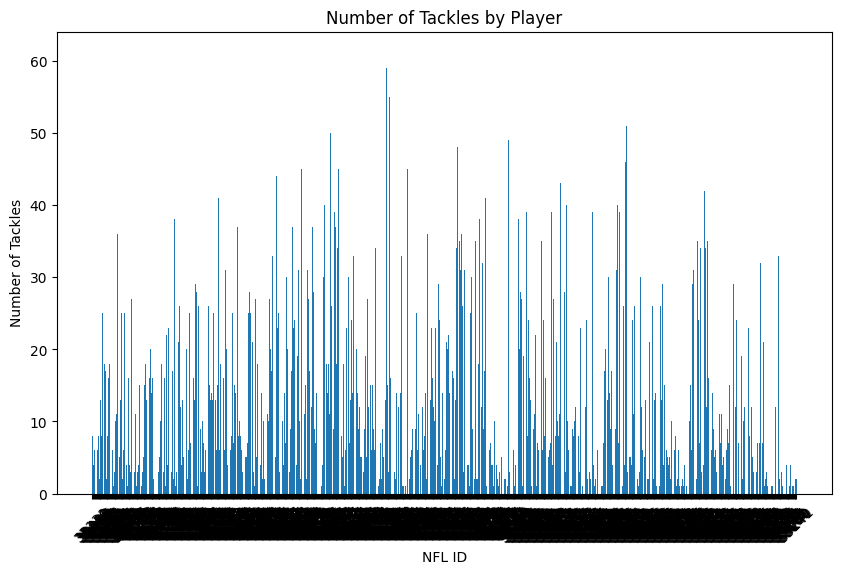


Final velocities and angles:
Object 1: v1f = 8.15 m/s, theta1f = 35.87 degrees
Object 2: v2f = 8.15 m/s, theta2f = 35.87 degrees


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_and_analyze_data():
    """Load and analyze tackling data from a CSV file."""
    df = pd.read_csv('tackles.csv')
    print("First few rows of the DataFrame:")
    print(df.head())
    print("\nBasic statistics:")
    print(df.describe())
    player_stats = df.groupby('nflId').agg({
        'tackle': 'sum',
        'assist': 'sum',
        'forcedFumble': 'sum',
        'pff_missedTackle': 'sum'
    }).reset_index()
    print("\nPlayer statistics:")
    print(player_stats)
    visualize_data(player_stats)

def visualize_data(player_stats):
    """Visualize the tackling data."""
    plt.figure(figsize=(10, 6))
    plt.bar(player_stats['nflId'].astype(str), player_stats['tackle'])
    plt.xlabel('NFL ID')
    plt.ylabel('Number of Tackles')
    plt.title('Number of Tackles by Player')
    plt.xticks(rotation=45)
    plt.show()

def validate_inputs(m1, v1, m2, v2):
    """Validates the input parameters for momentum calculation."""
    if m1 < 0 or m2 < 0 or v1 < 0 or v2 < 0:
        raise ValueError("Mass and velocity must be non-negative.")

def calculate_momentum_conservation(m1, v1, theta1, m2, v2, theta2, elastic=True):
    """Calculates the final velocities and angles of two colliding objects."""
    validate_inputs(m1, v1, m2, v2)
    theta1, theta2 = np.radians(theta1), np.radians(theta2)
    p1_before = m1 * v1 * np.array([np.cos(theta1), np.sin(theta1)])
    p2_before = m2 * v2 * np.array([np.cos(theta2), np.sin(theta2)])
    p_tot_before = p1_before + p2_before
    if not elastic:
        p_tot_before *= (1 - 0.5)  # Coefficient of restitution for inelastic collisions
    p1_after = p_tot_before * (m1 / (m1 + m2))
    p2_after = p_tot_before * (m2 / (m1 + m2))
    v1f = np.linalg.norm(p1_after) / m1
    v2f = np.linalg.norm(p2_after) / m2
    theta1f = np.degrees(np.arctan2(p1_after[1], p1_after[0]))
    theta2f = np.degrees(np.arctan2(p2_after[1], p2_after[0]))
    return ((v1f, theta1f), (v2f, theta2f))

if __name__ == "__main__":
    # Data Analysis
    load_and_analyze_data()

    # Physics Simulation
    m1, v1, theta1 = 10, 10, 30  # First object
    m2, v2, theta2 = 5, 5, 60    # Second object
    (v1f, theta1f), (v2f, theta2f) = calculate_momentum_conservation(m1, v1, theta1, m2, v2, theta2)
    print(f"\nFinal velocities and angles:")
    print(f"Object 1: v1f = {v1f:.2f} m/s, theta1f = {theta1f:.2f} degrees")
    print(f"Object 2: v2f = {v2f:.2f} m/s, theta2f = {theta2f:.2f} degrees")
